# Simple Linear Regression

## 1.Import Prerequisite Libraries

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset

In [205]:
df = pd.read_csv('E:\ML_Datasets\height-weight.csv')

In [206]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


## 3.Exploratory Data Analysis

### 1.Head

In [207]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


#### Insights : First five records of the dataset

### 2.Tail

In [208]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


#### Insights : Last five records of dataset

### 3.Shape

In [209]:
df.shape

(23, 2)

####  Insights : Dataset contains 23 records and 2 columns

### 4.Size

In [210]:
df.size

46

#### Insights : size of the dataset is 46

### 5.Info

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


#### Insights : Dataset has 2 columns and there is no any single null value and both having datatype is integer.

### 6.Check null value

In [212]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

#### Insights : Dataset does not have any single null value

### 7.Check duplicate value

In [213]:
df.duplicated().sum()

1

#### Insights : Dataset having 1 duplicate record

In [214]:
df[df.duplicated()]

,Weight,Height
11,95,182


### 8. Drop the null values

In [215]:
df.shape

(23, 2)

In [216]:
df = df.drop_duplicates()

In [217]:
df.shape

(22, 2)

#### Insights : Drop the duplicate value and not shape is 22 records and 2 columns

### 9.Describe

In [218]:
df.describe()

,Weight,Height
count,22.000000,22.000000
mean,72.863636,157.318182
std,17.672404,19.263551
min,45.000000,120.000000
25%,58.500000,141.250000
50%,77.000000,161.000000
75%,84.250000,173.750000
max,105.000000,183.000000


### 10.Correleation

In [219]:
df.corr()

,Weight,Height
Weight,1.000000,0.926124
Height,0.926124,1.000000


#### Insights : Weight is Highly Coreleated with Height

### 11. numerical columns 

In [220]:
numerical_column = df['Weight']

### 12.Heatmap

<AxesSubplot:>

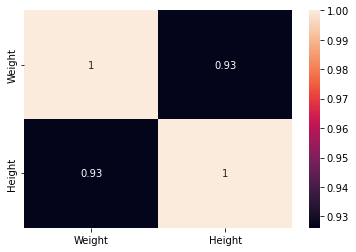

In [221]:
sns.heatmap(df.corr() , annot = True)

#### Insights :Weight is Highly Coreleated with Height

### 13.skewness

In [222]:
df.skew()

Weight   -0.057701
Height   -0.559629
dtype: float64

#### Insights : skewness of Height is -0.135545 and Weight is -0.591979

### 14.Scatterplot

<AxesSubplot:xlabel='Weight', ylabel='Height'>

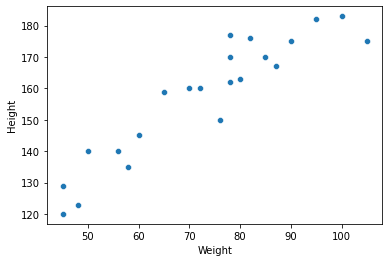

In [223]:
sns.scatterplot(df['Weight'] , df['Height'])

#### Insights : Data show positive covariance

### 15.Histplot

<AxesSubplot:xlabel='Weight', ylabel='Height'>

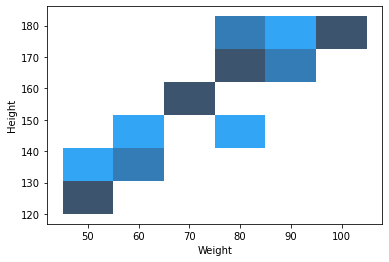

In [224]:
sns.histplot(x = 'Weight' , y = 'Height' , data = df , kde = True)

### 16.Distplot

<AxesSubplot:xlabel='Weight', ylabel='Density'>

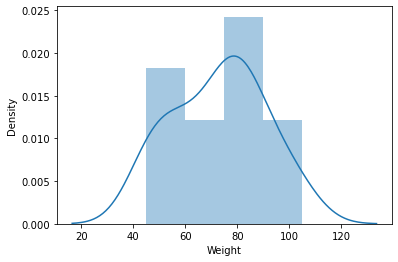

In [225]:
sns.distplot(a= df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

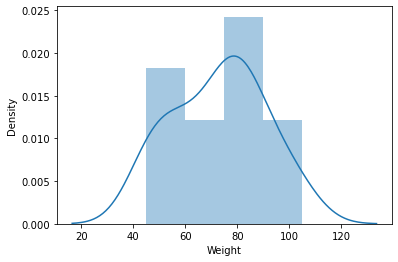

In [226]:
sns.distplot(a= df['Weight'])

### 17.Pairplot

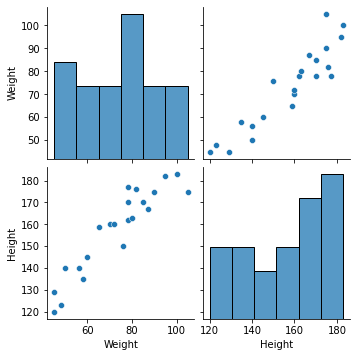

In [227]:
sns.pairplot(df)

#### Insights : Data show Positive Covariance

### 18.Boxplot

<AxesSubplot:>

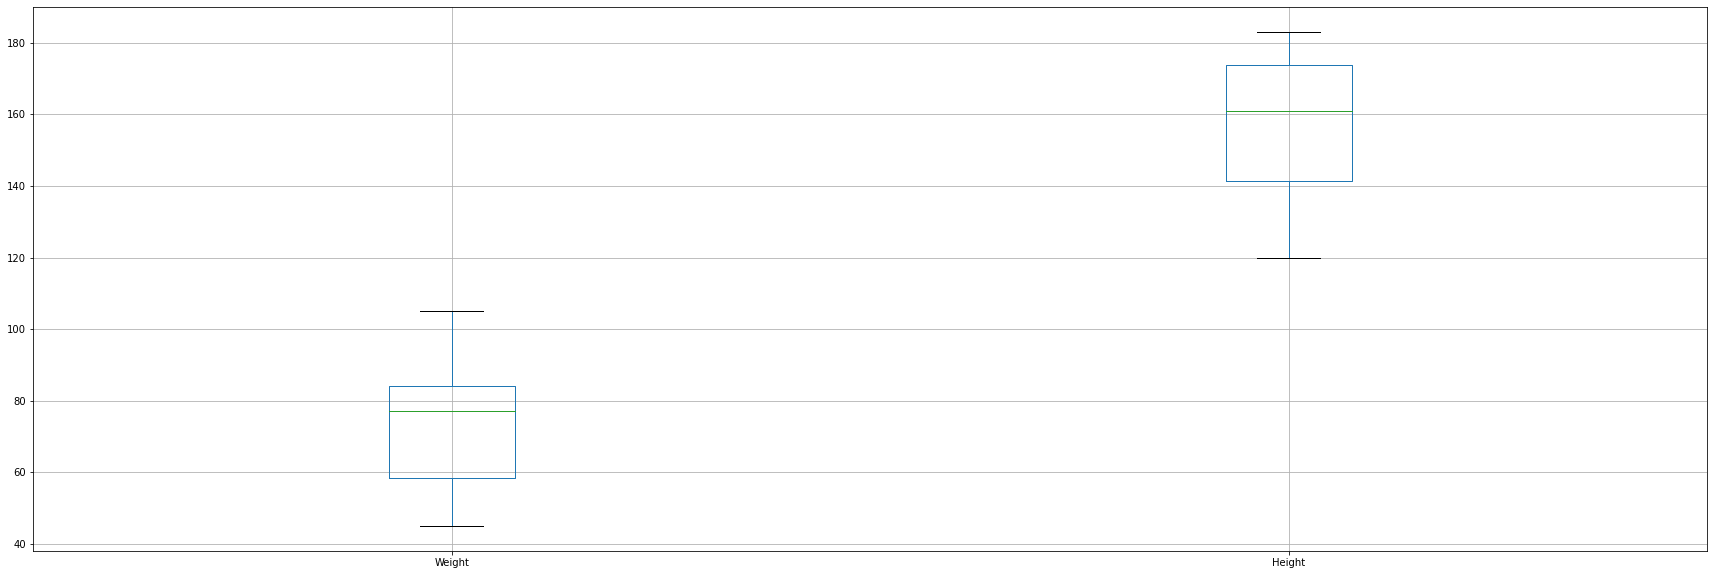

In [228]:
plt.figure(figsize = (30 , 10))
df.boxplot()

#### Insights : Dataset does not outliers

## 3.Building Machine Learning Model

### Data split into independent variable and dependent variable

In [229]:
x = df[['Weight']]
y = df[['Height']]

### Independent Variable

In [230]:
x.head(2)

,Weight
0,45
1,58


### Dependent Variable

In [231]:
y.head(2)

,Height
0,120
1,135


### Data split into train and test

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state  = 42)

In [234]:
x_train.shape , x_test.shape

((17, 1), (5, 1))

In [235]:
y_train.shape , y_test.shape

((17, 1), (5, 1))

## 4.Feature scaling

#### scaling : we need to data into same scale here weight is in kg and height is in cm . we need to get data in - 3 to + 3.
#### becase optimize convergence till global minima.

In [236]:
from sklearn.preprocessing import StandardScaler

In [237]:
scaler = StandardScaler() 

In [238]:
scaler

StandardScaler()

#### Train data is need to fit and transform

In [239]:
x_train = scaler.fit_transform(x_train)

#### Test data is only need to transform

In [240]:
x_test = scaler.transform(x_test)

### Scatterplot On Training Data

Text(0.5, 1.0, 'scatterplot of training data')

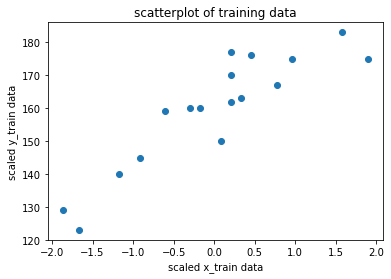

In [241]:
plt.scatter(x_train , y_train)
plt.xlabel('scaled x_train data')
plt.ylabel('scaled y_train data')
plt.title('scatterplot of training data')

#### Insights :  Training data show Positive Covariance

### Scatterplot On Testing Data

Text(0.5, 1.0, 'scatterplot of test data')

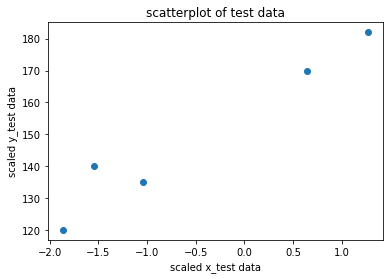

In [242]:
plt.scatter(x_test , y_test)
plt.xlabel('scaled x_test data')
plt.ylabel('scaled y_test data')
plt.title('scatterplot of test data')

#### Insights : Testing data show Positive Covariance

## Training the Model

### Import the Simple Linear Regression from sickitlearn

In [243]:
from sklearn.linear_model import LinearRegression

In [244]:
regressor = LinearRegression()

### Fit the train data

In [245]:
regressor.fit(x_train , y_train)

LinearRegression()

### Intercept

In [246]:
regressor.intercept_

array([159.64705882])

#### Insights : Intercept of Weight is 157.5

### Coeficient

In [247]:
regressor.coef_

array([[15.01548499]])

#### Insights : Coeficient or slope of Weight is 17.03440872

# Prediction for training data

Text(0.5, 1.0, 'scatterplot of training input and training output and best fit line of prediction test output')

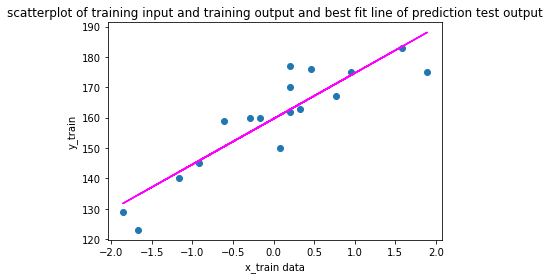

In [248]:
# Actual input and Actual Output
plt.scatter(x_train , y_train)

# Actual input  and prediction output
# y_pred_train = regressor.predict(x_train)
plt.plot(x_train , regressor.predict(x_train) , color = 'magenta')
plt.xlabel('x_train data')
plt.ylabel('y_train')
plt.title('scatterplot of training input and training output and best fit line of prediction test output')

### Training Output Prediction

In [249]:
y_pred_train = regressor.predict(x_train)

In [250]:
y_pred_train

array([[162.74149512],
       [142.07508126],
       [188.10482124],
       [145.83261105],
       [155.22643554],
       [160.86273023],
       [183.40790899],
       [171.19593716],
       [150.52952329],
       [134.56002167],
       [162.74149512],
       [157.10520043],
       [174.01408451],
       [166.49902492],
       [162.74149512],
       [131.74187432],
       [164.62026002]])

# Prediction for test data

Text(0.5, 1.0, 'scatterplot of test input and test output and best fit line of prediction test output')

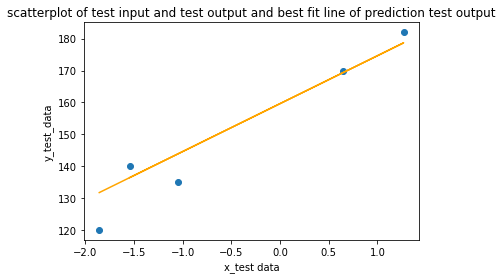

In [251]:
plt.scatter(x_test , y_test)
y_pred_test = regressor.predict(x_test)
plt.plot(x_test , y_pred_test , color = 'orange')
plt.xlabel('x_test data')
plt.ylabel('y_test_data')
plt.title('scatterplot of test input and test output and best fit line of prediction test output')

### Testing Output Prediction

In [252]:
y_pred_test = regressor.predict(x_test)

In [253]:
y_pred_test

array([[131.74187432],
       [169.31717226],
       [178.71099675],
       [143.95384615],
       [136.43878657]])

# Prediction of Train data

#### prediction training output = intercept + coeficient(weight)
#### y_pred_train = 157.5 + 17.03440872 * (x_train)

# Prediction of test data

#### prediction test output = intercept + coficient(weight)

#### y_pred_test = 157.5 + 17.03440872 * (x_test)

### Actual Output Data

In [254]:
y_test

,Height
0,120
14,170
8,182
1,135
16,140


### Prediction Output Data

In [255]:
y_pred_test

array([[131.74187432],
       [169.31717226],
       [178.71099675],
       [143.95384615],
       [136.43878657]])

## 5.performances metrics are MSE , MAE , RMSE

In [256]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [257]:
MSE = mean_squared_error(y_test , y_pred_test)
MAE = mean_absolute_error(y_test , y_pred_test)
RMSE = np.sqrt(MSE)

print('MSE : ' , MSE)
print('MAE : ' , MAE)
print('RMSE : ' , RMSE)

MSE :  48.401802156635156
MAE :  5.645752979414948
RMSE :  6.957140372066324


## Accuracy of the model are r squared , adjusted r squared

### R squared

### R^2 = 1 - SSR / SST

#### R^2 = Accuaracy of model
#### SSR = sum of square of residuals
#### SST = sum of square of Total

In [258]:
from sklearn.metrics import r2_score

In [259]:
r2_score = r2_score(y_test , y_pred_test)

In [260]:
r2_score

0.9085792494774948

#### Insights :  Accuracy of the model is 0.7769869860423441

### Adjusted r squared

### Adjusted R2 = 1 - (1 - r^2) * (N - 1) / (N- k - 1)

#### r^2 = Accuracy of model
#### N = number of observations of independent variable
#### K = Number of dependent / predictor variable

In [261]:
adjusted_r2_score  = 1 - (1 - r2_score) *(len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

In [262]:
adjusted_r2_score

0.8781056659699931

#### Insights : Adjusted r square of the model is 0.7026493147231254